# Example 12

The use case from the user manual. The example does not contain anything that is not covered in the previous examples.

In [1]:
import calfem.core as cfc
import calfem.vis_mpl as cfv
import calfem.utils as cfu
import calfem.shapes as cfs
import calfem.solver as cfslv

import numpy as np

In [2]:
%matplotlib notebook

## General problem variables

In [3]:
rect = cfs.Rectangle(5.0, 1.0, element_type=2, dofs_per_node=1, max_area=0.08)

rect.t = 1
rect.ep = [rect.t, 1]

rect.D = np.diag([1.7, 1.7])

## Create mesh

In [4]:
mesh = cfs.ShapeMesh(rect)    

## Solve problem

In [5]:
solver = cfslv.Flow2DSolver(mesh)

solver.addBC(rect.left_id, 0.0)
solver.addBC(rect.right_id, 120.0)
#solver.addForceTotal(rect.topId, -10e5, dimension=2)

results = solver.execute()       

## Visualise results

### Geometry

<IPython.core.display.Javascript object>


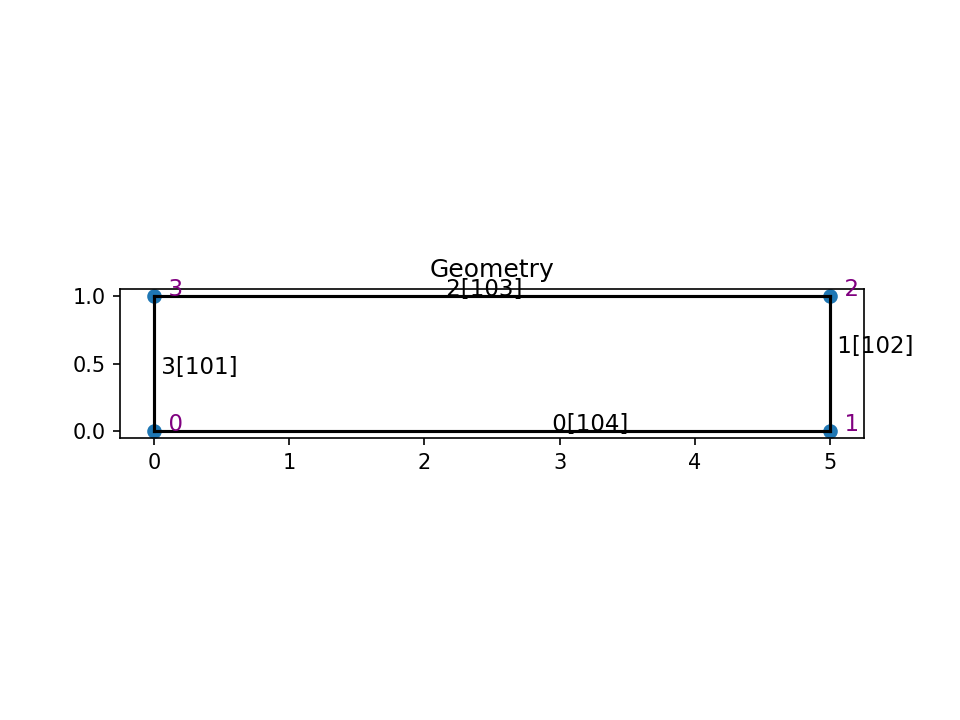

In [6]:
cfv.figure() 
cfv.draw_geometry(rect.geometry(), title="Geometry")

### Mesh

<IPython.core.display.Javascript object>


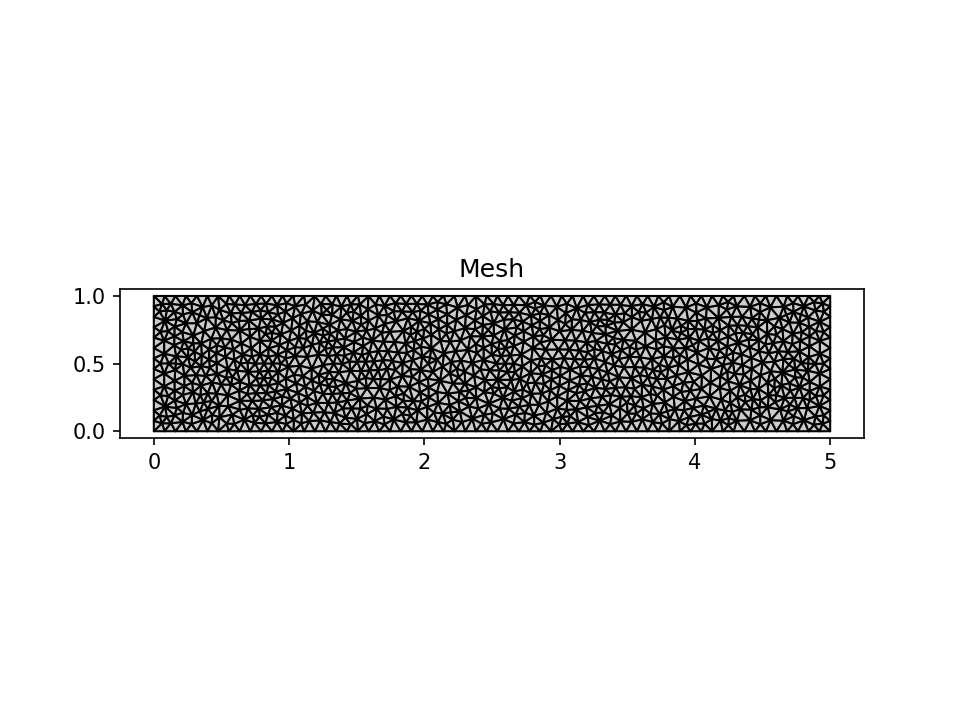

In [7]:
cfv.figure() 
cfv.draw_mesh(mesh.coords, mesh.edof, rect.dofs_per_node, rect.element_type, 
             filled=True, title="Mesh") #Draws the mesh.

### Nodal values

<IPython.core.display.Javascript object>


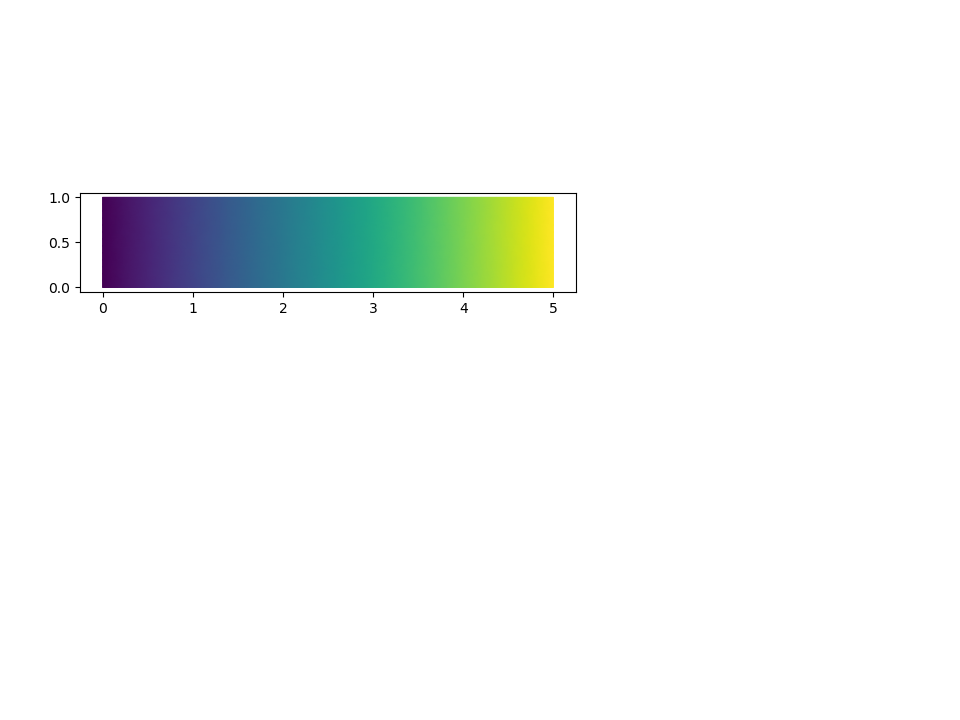

NameError: name 'plt' is not defined

In [9]:
cfv.figure() 
cfv.draw_nodal_values_shaded(results.a, mesh.coords, mesh.edof)
plt.colorbar()